### Načteme data

In [1]:
import numpy as np
import os

PATH = os.path.join("datasets", "07", "imdb")

In [2]:
import pandas as pd

def load_data(file, path=PATH):
    csv = os.path.join(path, file)
    return pd.read_csv(csv)

In [3]:
data = load_data("IMDB Dataset.csv")

### Prozkoumáme a předpřipravíme data

In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
data["label"] = (data["sentiment"] == "positive").astype(int)
data = data.rename(columns={"review":"text"})

In [7]:
data.head()

,text,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


### Rozdělíme dataset na trénovací, testovací a validační

In [5]:
from sklearn.model_selection import train_test_split
train_full, test = train_test_split(data, test_size=0.2, random_state=42)

In [6]:
train, valid = train_test_split(train_full, test_size=0.2, random_state=42)

In [10]:
train.shape

(32000, 3)

In [11]:
valid.shape

(8000, 3)

In [12]:
test.shape

(10000, 3)

### Převod textu na vektor

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
# Hack pro GPU na Windows
for gpu in tf.config.experimental.list_physical_devices('GPU'):
    tf.config.experimental.set_memory_growth(gpu, True)

Tokenizer převede slova na celočíselné indexy

In [9]:
num_words = 10000
tokenizer = keras.preprocessing.text.Tokenizer(num_words)
tokenizer.fit_on_texts(train["text"])

In [10]:
X_train = tokenizer.texts_to_sequences(train["text"])
X_valid = tokenizer.texts_to_sequences(valid["text"])
X_test = tokenizer.texts_to_sequences(test["text"])

In [17]:
train.iloc[0,0]

"With no fault to the actors (they all put on great performances), the overall story was not very well executed. The movie opens with a great zinger: a crazy old guy forces a young Aborigine girl's car off the road. But then, we're forced to endure 40 minutes of character development with an entirely new group of characters ... and we don't know why until the 40 minutes are up. It turns out that they are the ones who eventually discover the girl's body ... and the story progresses from there.<br /><br />While the story does pick up at that point, it really goes nowhere. After 2 hours, I asked myself: was there a point to this, or was it just to see the characters struggle with accusations of racism and stupidity of how they handled the discovery? The story was ultimately unsatisfying and felt unfinished. While it is well acted, there's not a strong enough backbone in the film to warrant recommending it."

In [18]:
X_train[0]

[17,
 54,
 2171,
 5,
 1,
 149,
 33,
 29,
 264,
 20,
 77,
 366,
 1,
 437,
 62,
 13,
 21,
 51,
 70,
 2207,
 1,
 16,
 2101,
 17,
 3,
 77,
 3,
 1004,
 156,
 222,
 1918,
 3,
 192,
 4131,
 526,
 123,
 1,
 1207,
 18,
 91,
 1041,
 885,
 5,
 4708,
 1904,
 227,
 4,
 108,
 958,
 17,
 32,
 1079,
 168,
 544,
 4,
 102,
 2,
 71,
 89,
 118,
 135,
 363,
 1,
 1904,
 227,
 23,
 53,
 9,
 519,
 42,
 12,
 33,
 23,
 1,
 680,
 36,
 874,
 1827,
 1,
 4131,
 660,
 2,
 1,
 62,
 4331,
 34,
 46,
 7,
 7,
 136,
 1,
 62,
 124,
 1230,
 53,
 30,
 12,
 215,
 9,
 63,
 272,
 1285,
 100,
 228,
 620,
 10,
 1711,
 543,
 13,
 46,
 3,
 215,
 5,
 11,
 38,
 13,
 9,
 39,
 5,
 64,
 1,
 102,
 1650,
 17,
 4,
 2706,
 2,
 2722,
 4,
 86,
 33,
 2365,
 1,
 3415,
 1,
 62,
 13,
 1159,
 6983,
 2,
 443,
 7373,
 136,
 9,
 6,
 70,
 889,
 224,
 21,
 3,
 565,
 190,
 8,
 1,
 19,
 5,
 7062,
 9]

In [19]:
tokenizer.sequences_to_texts([X_train[0]])

["with no fault to the actors they all put on great performances the overall story was not very well executed the movie opens with a great a crazy old guy forces a young girl's car off the road but then we're forced to endure 40 minutes of character development with an entirely new group of characters and we don't know why until the 40 minutes are up it turns out that they are the ones who eventually discover the girl's body and the story progresses from there br br while the story does pick up at that point it really goes nowhere after 2 hours i asked myself was there a point to this or was it just to see the characters struggle with of racism and stupidity of how they handled the discovery the story was ultimately unsatisfying and felt unfinished while it is well acted there's not a strong enough in the film to warrant it"]

Nyní musíme sekvence zarovnat na stejnou délku. Defaultně je padding i truncating 'pre'

In [11]:
maxlen = 500
X_train = keras.preprocessing.sequence.pad_sequences(X_train, padding='post', truncating='post', maxlen=maxlen)
X_valid = keras.preprocessing.sequence.pad_sequences(X_valid, padding='post', truncating='post', maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, padding='post', truncating='post', maxlen=maxlen)

In [12]:
y_train = train["label"]
y_valid = valid["label"]
y_test = test["label"]

In [22]:
X_train.shape

(32000, 500)

### Vytvoření modelu

In [20]:
model = keras.models.Sequential([
    layers.Embedding(num_words, 128, input_length=maxlen, mask_zero=True),
    layers.Conv1D(32, 7, activation='relu'),
    layers.MaxPooling1D(5),
    layers.Conv1D(32, 7, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(1, activation='sigmoid'),  
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

In [21]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [24]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/100
1000/1000 [==============================] - 14s 13ms/step - loss: 0.6907 - accuracy: 0.5426 - val_loss: 0.6386 - val_accuracy: 0.7588
Epoch 2/100
1000/1000 [==============================] - 13s 13ms/step - loss: 0.5434 - accuracy: 0.7920 - val_loss: 0.3445 - val_accuracy: 0.8558
Epoch 3/100
1000/1000 [==============================] - 13s 13ms/step - loss: 0.3114 - accuracy: 0.8723 - val_loss: 0.2976 - val_accuracy: 0.8756
Epoch 4/100
1000/1000 [==============================] - 13s 13ms/step - loss: 0.2579 - accuracy: 0.8965 - val_loss: 0.2775 - val_accuracy: 0.8832
Epoch 5/100
1000/1000 [==============================] - 13s 13ms/step - loss: 0.2258 - accuracy: 0.9089 - val_loss: 0.2729 - val_accuracy: 0.8885
Epoch 6/100
1000/1000 [==============================] - 13s 13ms/step - loss: 0.2059 - accuracy: 0.9200 - val_loss: 0.2727 - val_accuracy: 0.8861
Epoch 7/100
1000/1000 [==============================] - 13s 13ms/step - loss: 0.1985 - accuracy: 0.9235 - val_loss: 0

### Zobrazíme křivky 

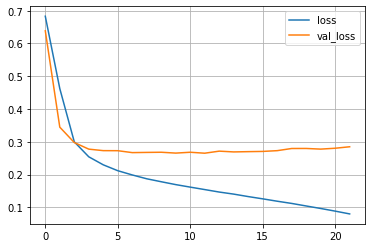

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.grid(True)

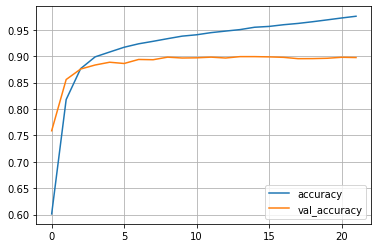

In [29]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.grid(True)

### Vyzkoušíme na testovacích datech

In [30]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2613 - accuracy: 0.8924


[0.2613072693347931, 0.8924000263214111]